In [ ]:
import nltk
nltk.download('brown')
from nltk.corpus import brown
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
from typing import List
import re
import networkx as nx
from typing import List
import matplotlib.pyplot as plt
import matplotlib.font_manager
from networkx import density 
import numpy as np
from networkx.algorithms.community.centrality import girvan_newman
import itertools
from itertools import chain, combinations
from scipy.cluster.hierarchy import dendrogram


In [ ]:
def processing(sentences:List[List[str]]):
    lemmatizer = WordNetLemmatizer()
    lemmatized = [[lemmatizer.lemmatize(word) for word in sentence] for sentence in sentences]
    lower = [[word.lower() for word in sentence] for sentence in lemmatized]
    cleaned = [[re.sub(r'[^A-Za-z0-9]+', '', word) for word in sentence] for sentence in lower]
    stop = stopwords.words('english')
    stop.append('af')
    removing_stops = [[word for word in sentence if word not in stop] for sentence in cleaned]
    result = [[word for word in sentence if word] for sentence in removing_stops]
    
    for t in result:
      e1 = t[0][0]
      e2 = t[0][1]
      e3 = t[1]
      tt = {e1, e2, e3}
    new_list_of_tuples.append(tt)
    return(result) 
print(processing(brown.sents()[:20]))

    

In [ ]:
def first_graph(input):
  pairs = []  
  for sentence in input:
      for i in range(len(sentence)-1):
       pairs.append([sentence[i], sentence[i + 1]])    
      for i in range(len(sentence)-1):
       pairs.append([sentence[i], sentence[i -1]])
  G = nx.Graph(pairs)
  G2 = nx.DiGraph(pairs)
  pos = nx.kamada_kawai_layout(G)
  #pos = nx.kamada_kawai_layout(G2)
  plt.figure(figsize=(12, 12))
  
  nx.draw(G, pos, with_labels=True,font_size=10, node_color=range(G.number_of_nodes()),node_size= range(G.number_of_nodes()), edge_color= 'grey', cmap=plt.cm.Reds)
  # or nx.draw(g2, pos, with_labels=True,font_size=10, node_color=range(g2.number_of_nodes()),node_size= range(g2.number_of_nodes()), edge_color= 'grey', cmap=plt.cm.Reds)
  return (G, pairs)
  # or return (g2,pairs)
G, ps = first_graph(processing(brown.sents()[:16]))
print(G)



## Descriptive analysis
Посмотрите сколько компонент, вершин, ребер. Если компонент несколько, не забывайте при анализе это учитывать. Плотность. Средняя степень вершины в графе. (2 points)

In [388]:
print('Количество вершин: {}'.format(G.number_of_nodes()))
print('Количество рёбер: {}'.format(G. number_of_edges()))
print('Средняя степень вершины: {}'.format(round(G.number_of_edges() / float(G.number_of_nodes()), 2)))
print('Degree_centrality: {}'.format(nx.degree_centrality(G)))
print('Betweenness_centrality: {}'.format(nx.betweenness_centrality(G)))
print('Closeness_centrality: {}'.format(nx.closeness_centrality(G)))
print('Eigenvector_centrality: {}'.format(nx.eigenvector_centrality(G)))



Количество вершин: 159
Количество рёбер: 214
Средняя степень вершины: 1.35
Degree_centrality: {'fulton': 0.056962025316455694, 'county': 0.056962025316455694, 'grand': 0.02531645569620253, 'jury': 0.08860759493670886, 'said': 0.0759493670886076, 'friday': 0.012658227848101266, 'investigation': 0.012658227848101266, 'atlantas': 0.012658227848101266, 'recent': 0.012658227848101266, 'primary': 0.02531645569620253, 'election': 0.06329113924050633, 'produced': 0.012658227848101266, 'evidence': 0.012658227848101266, 'irregularity': 0.02531645569620253, 'took': 0.02531645569620253, 'place': 0.012658227848101266, 'termend': 0.012658227848101266, 'presentment': 0.012658227848101266, 'city': 0.0759493670886076, 'executive': 0.012658227848101266, 'committee': 0.012658227848101266, 'overall': 0.012658227848101266, 'charge': 0.012658227848101266, 'deserves': 0.012658227848101266, 'praise': 0.012658227848101266, 'thanks': 0.012658227848101266, 'atlanta': 0.02531645569620253, 'manner': 0.012658227848

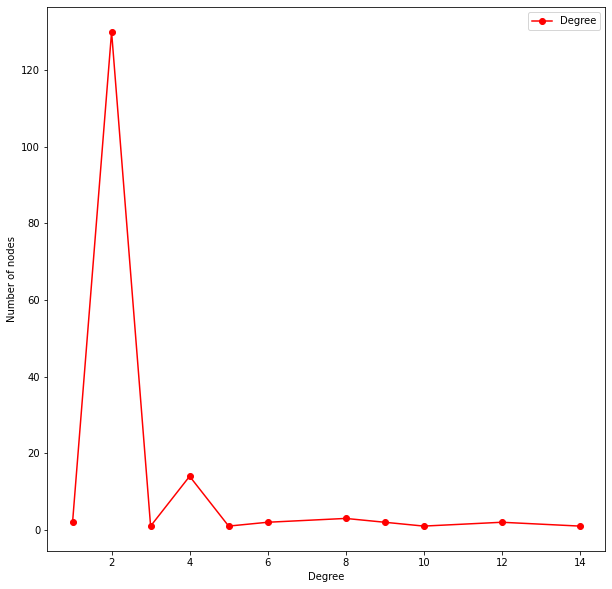

In [381]:
degree = dict(G.degree())
degree_values = sorted(set(degree.values()))
hist = [list(degree.values()).count(x) for x in degree_values]
plt.figure(figsize=(10, 10))
plt.plot(degree_values, hist, 'ro-')
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()

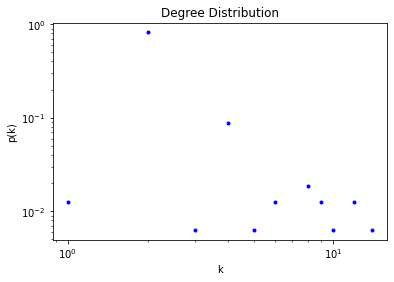

In [390]:
degree_hist = nx.degree_histogram(G) 
degree_hist = np.array(degree_hist, dtype=float)
degree_prob = degree_hist/G.number_of_nodes()
plt.loglog(np.arange(degree_prob.shape[0]),degree_prob,'b.')
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('Degree Distribution')
plt.show()

# Поиск сообществ

In [407]:
comp = girvan_newman(G)
res = {i:words for i, words in enumerate(tuple(sorted(c) for c in next(comp)))}
# бинарное разбиение исходного графа на сообщетва
res

{0: ['act',
  'allen',
  'also',
  'ambiguous',
  'among',
  'atlanta',
  'automobile',
  'charge',
  'charged',
  'city',
  'commented',
  'committee',
  'conducted',
  'court',
  'deserves',
  'durwood',
  'effected',
  'election',
  'end',
  'evidence',
  'exception',
  'executive',
  'fulton',
  'georgias',
  'handful',
  'hardfought',
  'implementation',
  'improving',
  'inadequate',
  'investigate',
  'irregularity',
  'ivan',
  'jr',
  'judge',
  'jury',
  'law',
  'legislator',
  'manner',
  'may',
  'mayornominate',
  'modernizing',
  'number',
  'often',
  'outgoing',
  'outmoded',
  'overall',
  'personnel',
  'place',
  'policy',
  'possible',
  'praise',
  'presentment',
  'primary',
  'problem',
  'produced',
  'pye',
  'received',
  'recommended',
  'registration',
  'relative',
  'remedy',
  'report',
  'result',
  'revised',
  'septemberoctober',
  'size',
  'state',
  'step',
  'studied',
  'superior',
  'swipe',
  'take',
  'term',
  'termend',
  'thanks',
  'title'

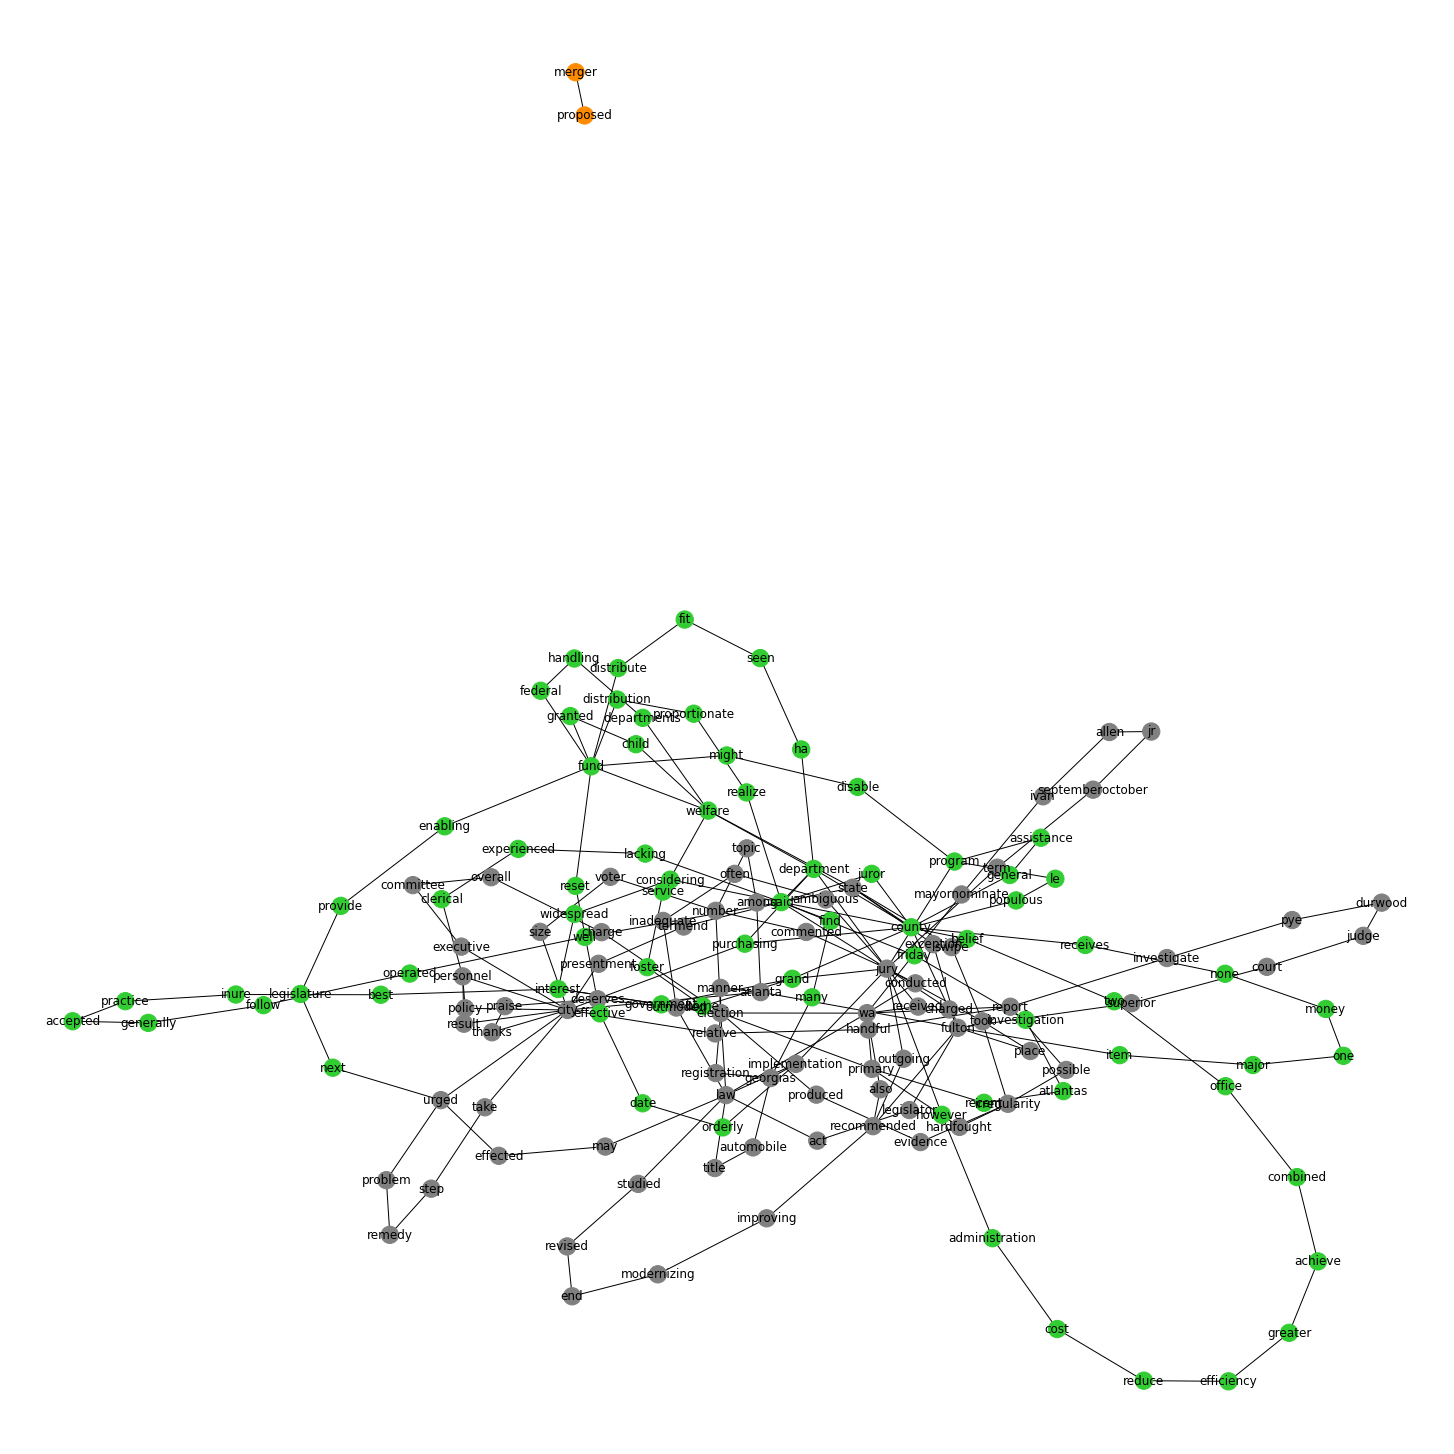

In [411]:
subset_color = [
    "grey",
    "limegreen",
    "darkorange",
]
color = [ ]
for v in G.nodes():
  for i, words in res.items():
    if v in words:
      color.append(subset_color[i])
plt.figure(figsize=(20, 20))

nx.draw(G, node_color=color, with_labels=True)
plt.show()

In [416]:
k = 2
for communities in itertools.islice(comp, k):
    print({indx: words for indx, words in enumerate(tuple(sorted(c) for c in communities))})  

{0: ['act', 'allen', 'also', 'ambiguous', 'automobile', 'charged', 'commented', 'conducted', 'election', 'end', 'evidence', 'exception', 'fulton', 'georgias', 'hardfought', 'implementation', 'improving', 'inadequate', 'irregularity', 'ivan', 'jr', 'jury', 'law', 'legislator', 'mayornominate', 'modernizing', 'number', 'often', 'outgoing', 'outmoded', 'place', 'primary', 'produced', 'received', 'recommended', 'registration', 'revised', 'septemberoctober', 'state', 'studied', 'swipe', 'term', 'title', 'took', 'wa'], 1: ['assistance', 'child', 'county', 'date', 'department', 'departments', 'disable', 'distribute', 'effective', 'enabling', 'federal', 'fit', 'foster', 'fund', 'general', 'grand', 'granted', 'ha', 'handling', 'home', 'le', 'legislature', 'might', 'next', 'orderly', 'populous', 'program', 'provide', 'purchasing', 'reset', 'seen', 'service', 'welfare'], 2: ['accepted', 'atlantas', 'best', 'clerical', 'considering', 'distribution', 'experienced', 'find', 'follow', 'friday', 'gene

## Что-то у меня ничего не получилось, сначала делала без стопслов, но там получаются очевидные связи, думала, что со стоп-словами будет интереснее, но нет:(
поэтому даже не понимаю, как проанализировать
